In [1]:
# Import Tensor-flow and import Keras  
import csv
from csv import reader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading from CSV file and rearrangement of data
file='MP.csv'
csvfile= open(file)
readfile=reader(csvfile)

data={}
for row in readfile:
  print(row)
  if row[0] == 'Sales':
    data['Sales']=row[1:]
  if row[0] == 'Expenses':
    data['Expenses']=row[1:]
  if row[0] == 'Net profit':
    data['PAT']=row[1:]


['\ufeffMARKSANS PHARMA LTD', '', '', '', '', '', '', '', '', 'SCREENER.IN', '']
['', '', '', '', '', '', '', '', '', '', '']
['Narration', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22']
['Sales', ' 356.47 ', ' 358.36 ', ' 330.20 ', ' 348.96 ', ' 361.20 ', ' 362.63 ', ' 418.04 ', ' 433.77 ', ' 452.57 ', ' 479.83 ']
['Expenses', ' 273.32 ', ' 267.29 ', ' 234.82 ', ' 271.61 ', ' 301.11 ', ' 304.83 ', ' 354.39 ', ' 360.91 ', ' 372.30 ', ' 403.19 ']
['Operating Profit', ' 83.15 ', ' 91.07 ', ' 95.38 ', ' 77.35 ', ' 60.09 ', ' 57.80 ', ' 63.65 ', ' 72.86 ', ' 80.27 ', ' 76.64 ']
['Other Income', ' 3.67 ', ' -3.17 ', ' 6.01 ', ' 5.88 ', ' 8.57 ', ' 12.06 ', ' 15.34 ', ' 16.50 ', ' 14.15 ', ' 17.65 ']
['Depreciation', ' 18.99 ', ' 8.58 ', ' 1.33 ', ' 7.47 ', ' 7.39 ', ' 8.56 ', ' 21.36 ', ' 11.12 ', ' 14.05 ', ' 12.74 ']
['Interest', ' 1.93 ', ' 1.68 ', ' 2.83 ', ' 0.97 ', ' 1.50 ', ' 0.95 ', ' 5.03 ', ' 1.80 ', ' 2.54 ', ' 2.35 ']
['Profit

In [3]:
#Data processing: making string to float for any list
def making_float(listname):
  emptylist=[]
  for row in listname:
    emptylist.append(float(row))
  return emptylist

#QOQ Sales
qoq_sales= making_float(data['Sales'])

#QOQ Expenses
qoq_expenses= making_float(data['Expenses'])

#QOQ PAT
qoq_pat= making_float(data['PAT'])


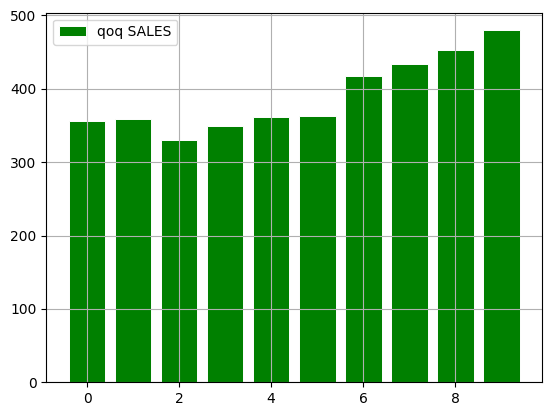

In [4]:
#Visulization of QOQ SALES vs PAT
x=np.arange(len(qoq_sales))
plt.bar(x,qoq_sales, width=0.8, color='green', edgecolor="white", linewidth=0.7, label='qoq SALES')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
#calculation of EBIT
#EBITDA is defined as Earnings before interest, Tax, Depreciation and Amortization  
#Hence we can get it as EBITDA= Sales - Total expences

EBITDA=[]
for num in range(len(qoq_sales)):
  EBITDA.append(qoq_sales[num] - qoq_expenses[num])


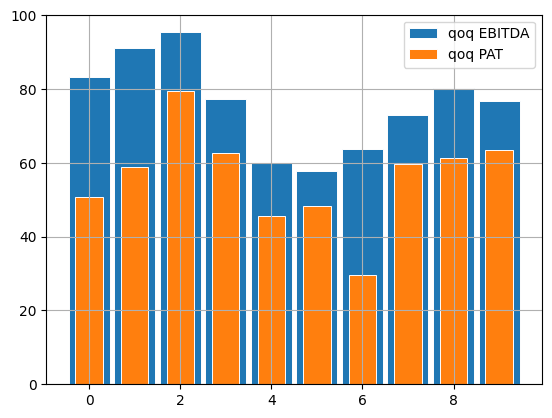

In [6]:
#Visulization of QOQ EBITDA vs PAT
x=np.arange(len(EBITDA))
plt.bar(x,EBITDA, width=0.9, edgecolor="white", linewidth=0.7, label='qoq EBITDA' )
plt.bar(x,qoq_pat, width=0.6, edgecolor="white", linewidth=0.7, label='qoq PAT' )
plt.legend()
plt.grid(True)
plt.show()

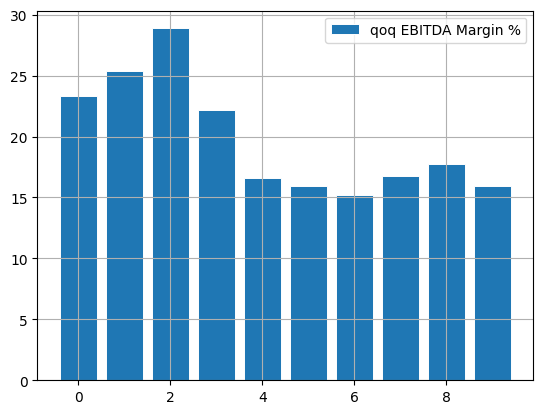

In [7]:
#calculation of EBITDA Margin
#EBITDA Margin is defined EBITDA/Sales(Revenue)
EBITDA_margin=[]
for num in range(len(EBITDA)):
  EBITDA_margin.append((EBITDA[num]/qoq_sales[num])*100)


#Visulization of QOQ EBITDA margin 
x=np.arange(len(EBITDA_margin))
plt.bar(x,EBITDA_margin, width=0.8, edgecolor="white", linewidth=0.7, label='qoq EBITDA Margin %' )
plt.legend()
plt.grid(True)
plt.show()

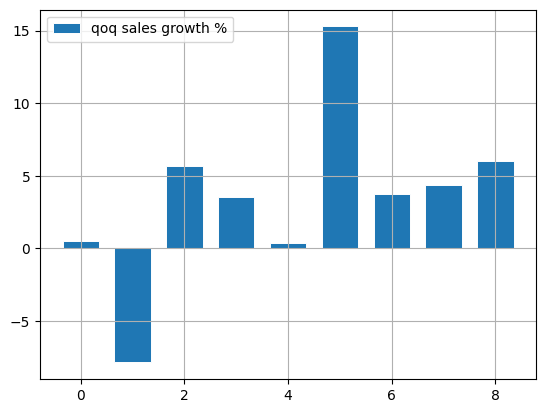

In [8]:
#Defining a function which can calculate QOQ/YOY changes in financial parameter in percentage
def growth(listname):
  emptylist=[]
  for m in range(len(listname)-1):
    emptylist.append(((listname[m+1]-listname[m])/listname[m])*100)
  return emptylist

#QOQ SALES Growth in percentage
qoq_sales_growth_in_percent= growth(qoq_sales)

#Visulization of QOQ SALES Growth in percentage
x=np.arange(len(qoq_sales_growth_in_percent))
plt.bar(x,qoq_sales_growth_in_percent, width=0.7, edgecolor="white", linewidth=0.7, label='qoq sales growth %' )
plt.legend()
plt.grid(True)
plt.show()

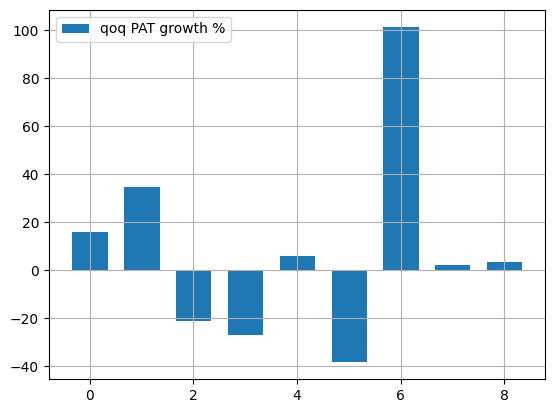

In [9]:
#QOQ PAT Growth in percentage
qoq_PAT_growth_in_percent= growth(qoq_pat)

#Visulization of QOQ PAT Growth
x=np.arange(len(qoq_PAT_growth_in_percent))
plt.bar(x,qoq_PAT_growth_in_percent, width=0.7, edgecolor="white", linewidth=0.7, label='qoq PAT growth %' )
plt.legend()
plt.grid(True)
plt.show()

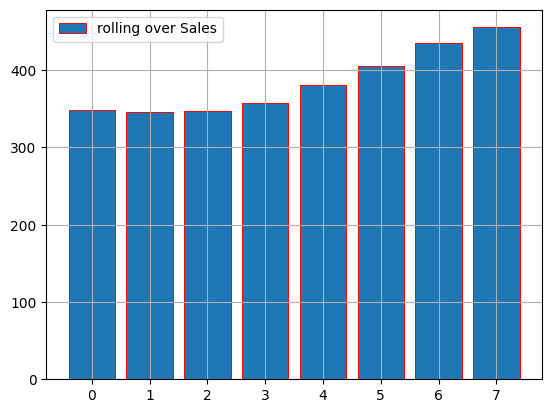

In [10]:
# Rolling over any financial parameter

def rolling(listname,period):
  emptylist=[]
  for m in range(len(listname)):
    if m+period <= len(listname):
       emptylist.append(sum(listname[m:m+period])/period)
  return emptylist

# Rolling over quaterly sales
# Input for rolling over 
period=3
parameter=qoq_sales
#end of input
three_q_roll_sales= rolling(parameter, period)

x=np.arange(len(three_q_roll_sales))
plt.bar(x,three_q_roll_sales, width=0.8, edgecolor="red", linewidth=0.7, label='rolling over Sales')
plt.legend()
plt.grid(True)
plt.show()



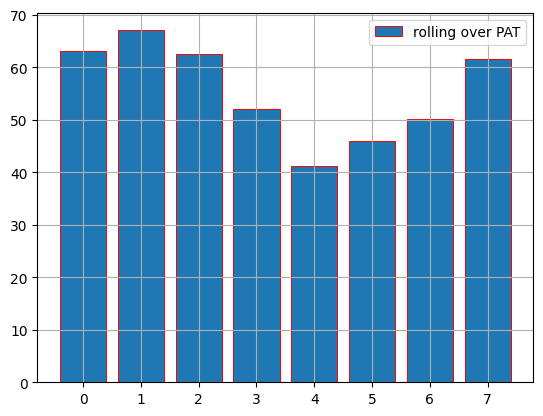

In [11]:
# Rolling over quaterly PAT
# Input for rolling over 
period=3
parameter=qoq_pat
#end of input
three_q_roll_pat= rolling(parameter, period)

x=np.arange(len(three_q_roll_pat))
plt.bar(x,three_q_roll_pat, width=0.8, edgecolor="red", linewidth=0.7, label='rolling over PAT')
plt.legend()
plt.grid(True)
plt.show()

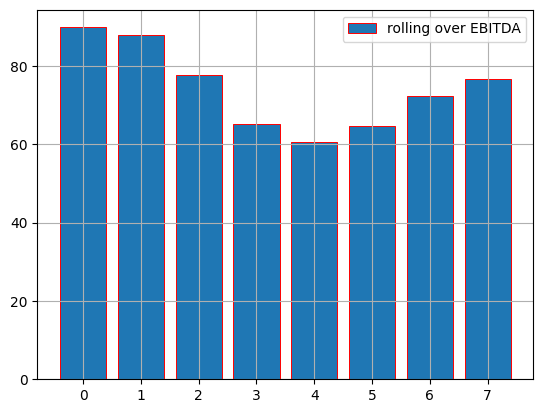

In [12]:
# Rolling over quaterly EBITDA
# Input for rolling over 
period=3
parameter=EBITDA
#end of input
three_q_roll_EBITDA= rolling(parameter, period)

x=np.arange(len(three_q_roll_EBITDA))
plt.bar(x,three_q_roll_EBITDA, width=0.8, edgecolor="red", linewidth=0.7, label='rolling over EBITDA')
plt.legend()
plt.grid(True)
plt.show()

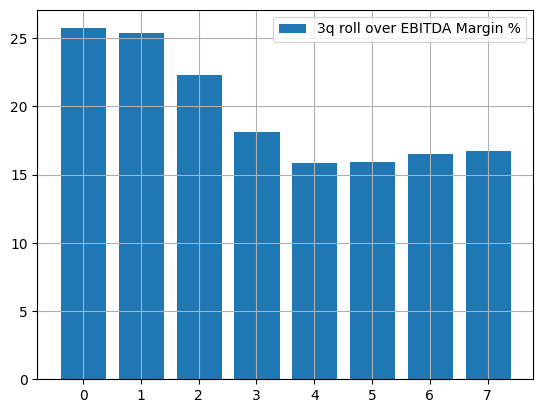

In [13]:
#calculation of 3q Rolling over EBITDA Margin
#This has been done by [3 q roll over of EBITDA]/[3 q roll over of Sales(Revenue)]
three_q_roll_EBITDA_margin=[]
for num in range(len(three_q_roll_EBITDA)):
  three_q_roll_EBITDA_margin.append((three_q_roll_EBITDA[num]/three_q_roll_sales[num])*100)

#Visulization of 3 Quaters roll over EBITDA margin 
x=np.arange(len(three_q_roll_EBITDA_margin))
plt.bar(x,three_q_roll_EBITDA_margin, width=0.8, edgecolor="white", linewidth=0.7, label='3q roll over EBITDA Margin %' )
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Defining Compounded growth in finanancial parameter

def compound(listname):
  count=0
  emptylist=[]
  for m in range(len(listname)):
    count=+1
    compounded_sales_growth=((listname[m]/listname[0])*(1/count) -1)*100  
    emptylist.append(compounded_sales_growth)
  return emptylist





